# NLP - Análise de sentimentos

### Bibliotecas básicas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 18

### Carregando os dados

In [4]:
resenha = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/imdb-reviews-pt-br.csv')
print(resenha.shape)
resenha.sample(5)

(49459, 4)


,id,text_en,text_pt,sentiment
21185,21187,Send them to the freezer. This is the solution...,Envie-os para o freezer. Esta é a solução que ...,pos
41518,41520,The number of times Ive had tears in my eyes w...,O número de vezes que tenho lágrimas nos olhos...,pos
2655,2657,I viewed the first two nights before coming to...,Eu vi as duas primeiras noites antes de vir ao...,neg
30644,30646,"My one line summary should explain it all, but...","Meu resumo de uma linha deve explicar tudo, ma...",neg
36284,36286,"To put it simply, I am not fond of westerns. A...","Simplificando, não gosto de westerns. E nunca ...",neg


In [5]:
resenha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [6]:
print('Resenha negativa: ')
resenha['text_pt'][189]

Resenha negativa: 


'Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.'

In [7]:
print('Resenha positiva: ')
resenha['text_pt'][49002]

Resenha positiva: 


'Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior que você

In [8]:
resenha['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

### Enconder das targets

In [9]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])
resenha['classificacao'] = classificacao
resenha.sample(5)

,id,text_en,text_pt,sentiment,classificacao
37035,37037,This was on the 30th Anniversary DVD for Blazi...,Isso foi no DVD do 30º aniversário da Blazing ...,neg,0
47010,47012,This gloriously turgid melodrama represents Do...,Este melodrama gloriosamente túrgido represent...,pos,1
2172,2174,So me and my friend are carousing our local mo...,Então eu e meu amigo estamos despertando a nos...,neg,0
7467,7469,"Oddly enough, its Fred MacMurray who plays the...","Curiosamente, o seu Fred MacMurray, que interp...",neg,0
13251,13253,"Probably one of his lesser known films, it suf...",Provavelmente um de seus filmes menos conhecid...,pos,1


### Função para classificar sentimentos

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  X_train, X_test, y_train, y_test = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)

  regressao_logistica = LogisticRegression(solver='lbfgs')
  regressao_logistica.fit(X_train, y_train)
  return regressao_logistica.score(X_test, y_test)


print(classificar_texto(resenha, 'text_pt', 'classificacao'))

0.6689041649818035


### Nuvens de palavras

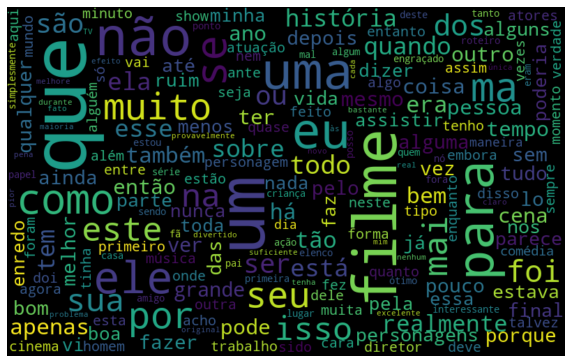

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(['da', 'meu', 'em', 'você', 'de', 'ao', 'os'])

todas_as_palavras = ' '.join([texto for texto in resenha['text_pt']])
nuvem_de_palavras = WordCloud(stopwords=stopwords, 
                              background_color='black', 
                              width=800, 
                              height=500, max_font_size=110, collocations=False).generate(todas_as_palavras)

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()